In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [113]:
#importing dataset of italy
df=pd.read_csv('/content/drive/My Drive/covid19_italy_region.csv',index_col='Date',parse_dates=True)
df.head()

,SNo,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
Date,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,0,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,1,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,2,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,3,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,4,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,NaN


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4242 entries, 2020-02-24 18:00:00 to 2020-09-12 17:00:00
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SNo                        4242 non-null   int64  
 1   Country                    4242 non-null   object 
 2   RegionCode                 4242 non-null   int64  
 3   RegionName                 4242 non-null   object 
 4   Latitude                   4242 non-null   float64
 5   Longitude                  4242 non-null   float64
 6   HospitalizedPatients       4242 non-null   int64  
 7   IntensiveCarePatients      4242 non-null   int64  
 8   TotalHospitalizedPatients  4242 non-null   int64  
 9   HomeConfinement            4242 non-null   int64  
 10  CurrentPositiveCases       4242 non-null   int64  
 11  NewPositiveCases           4242 non-null   int64  
 12  Recovered                  4242 non-null   int64  
 13  Deaths      

In [115]:
df.describe()

,SNo,RegionCode,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
count,4242.00000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000,3.087000e+03
mean,2120.50000,11.857143,43.046293,12.225955,399.320368,44.786657,444.107025,1514.022867,1958.129892,67.504479,5967.488213,1265.888496,9191.506601,1.552927e+05
std,1224.70425,6.274538,2.489074,2.659261,1248.978546,132.633550,1376.869330,3391.694678,4527.028354,189.132973,12274.474700,3075.511105,17840.793653,1.685709e+05
min,0.00000,1.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-229.000000,0.000000,0.000000,0.000000,3.482000e+03
25%,1060.25000,7.000000,41.125596,11.121231,9.000000,0.000000,10.000000,80.000000,97.000000,2.000000,363.000000,76.000000,1162.000000,4.818100e+04
50%,2120.50000,12.000000,43.616760,12.388247,50.000000,5.000000,56.000000,352.000000,417.000000,11.000000,1660.000000,292.000000,3281.000000,9.306000e+04
75%,3180.75000,17.000000,45.434905,13.768136,215.000000,26.000000,242.750000,1348.750000,1660.500000,53.000000,4648.250000,965.500000,8102.750000,2.043725e+05
max,4241.00000,22.000000,46.499335,16.867367,12077.000000,1381.000000,13328.000000,30382.000000,37307.000000,3251.000000,77611.000000,16896.000000,103074.000000,1.120531e+06


In [116]:
#shape of Dataframe
df.shape

(4242, 16)

In [117]:
df.nunique().to_frame()

,0
SNo,4242
Country,1
RegionCode,21
RegionName,21
Latitude,21
Longitude,22
HospitalizedPatients,977
IntensiveCarePatients,371
TotalHospitalizedPatients,1012
HomeConfinement,1914


In [118]:
#dropping the columns and renaming some of them
df.drop(['SNo','Latitude','Longitude','HospitalizedPatients','IntensiveCarePatients','HomeConfinement'],axis=1 , inplace=True)
df.rename(columns={'CurrentPositiveCases':"Active_Case",'RegionName':"Region"},inplace=True)
df.head()

,Country,RegionCode,Region,TotalHospitalizedPatients,Active_Case,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
Date,,,,,,,,,,
2020-02-24 18:00:00,ITA,13,Abruzzo,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,ITA,17,Basilicata,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,ITA,18,Calabria,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,ITA,15,Campania,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,ITA,8,Emilia-Romagna,12,18,18,0,0,18,NaN


Text(0.5, 0, 'Date')

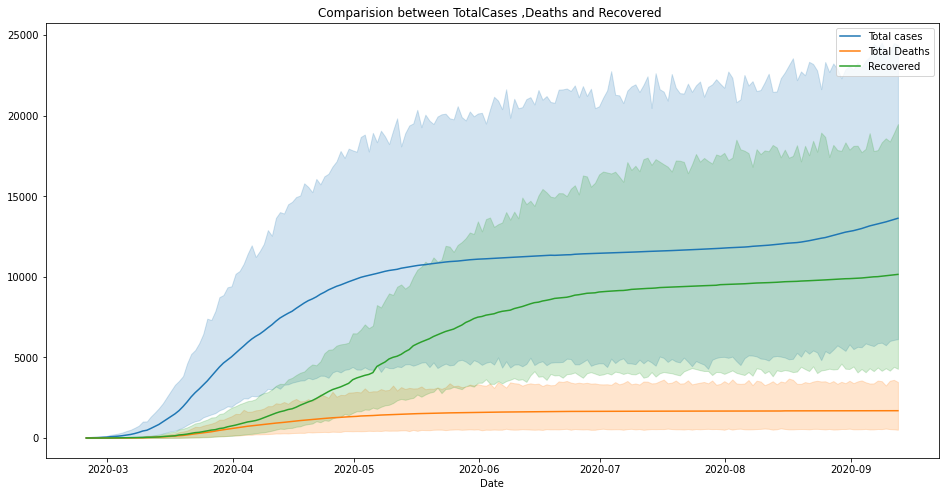

In [127]:
# Comparision between TotalCases ,Deaths and Recovered 
plt.figure(figsize=(16,8))
plt.title('Comparision between TotalCases ,Deaths and Recovered ')
sns.lineplot(data=df['TotalPositiveCases'],label='Total cases')
sns.lineplot(data=df['Deaths'],label='Total Deaths')
sns.lineplot(data=df['Recovered'],label='Recovered')
plt.xlabel('Date')

Text(0.5, 1.0, 'Relation Between Total Positive case and Recovered Patients')

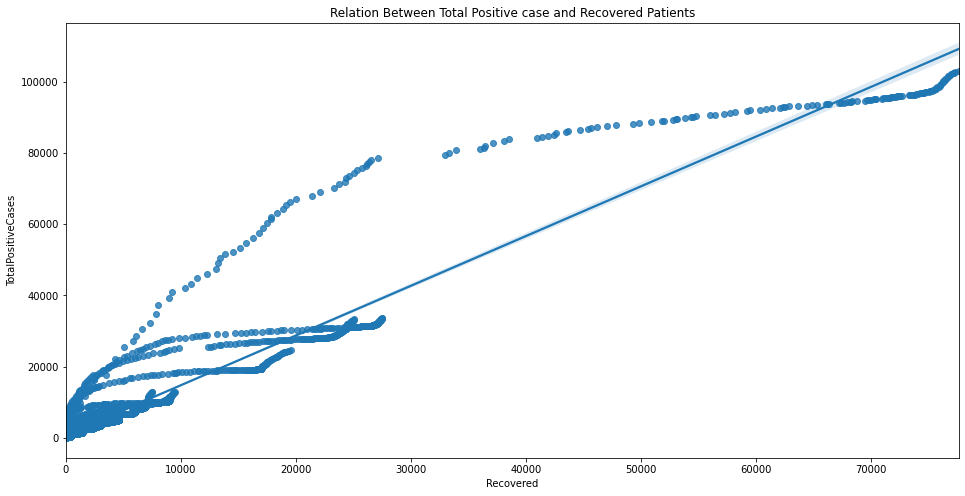

In [126]:
#Comparision and finding relation how patients are recovering with increase in totalcase

plt.figure(figsize=(16,8))
sns.regplot(x=df['Recovered'], y=df['TotalPositiveCases'])
plt.title('Relation Between Total Positive case and Recovered Patients')

In [121]:
#Making a dataframe by grouping columns 
italy =df.groupby("Region")['TotalPositiveCases','Active_Case','Recovered','Deaths'].sum().reset_index()
italy.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Region,TotalPositiveCases,Active_Case,Recovered,Deaths
0,Abruzzo,537546,140503,329558,67485
1,Basilicata,70445,16875,49278,4292
2,Calabria,203787,54276,134280,15231
3,Campania,833219,239379,527260,66580
4,Emilia-Romagna,4710617,899332,3142737,668548


In [122]:
italy.shape

(21, 5)

Text(0.5, 1.0, 'Trending Pattern of "Total Cases", "Recovered", "Deaths"and "Active cases')

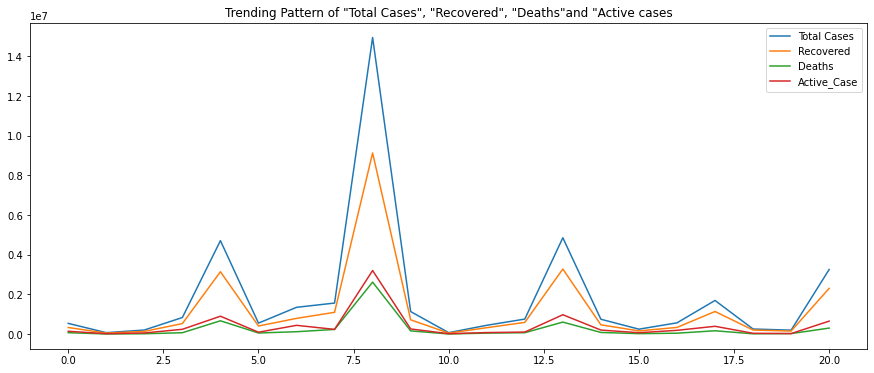

In [128]:
#line plot B/W "Total Cases", "Recovered", "Deaths", "Active cases"
plt.figure(figsize=(15,6))
sns.lineplot(data=italy['TotalPositiveCases'],label='Total Cases')
sns.lineplot(data=italy['Recovered'],label='Recovered')
sns.lineplot(data=italy['Deaths'],label='Deaths')
sns.lineplot(data=italy['Active_Case'],label='Active_Case')
plt.title('Trending Pattern of "Total Cases", "Recovered", "Deaths"and "Active cases')

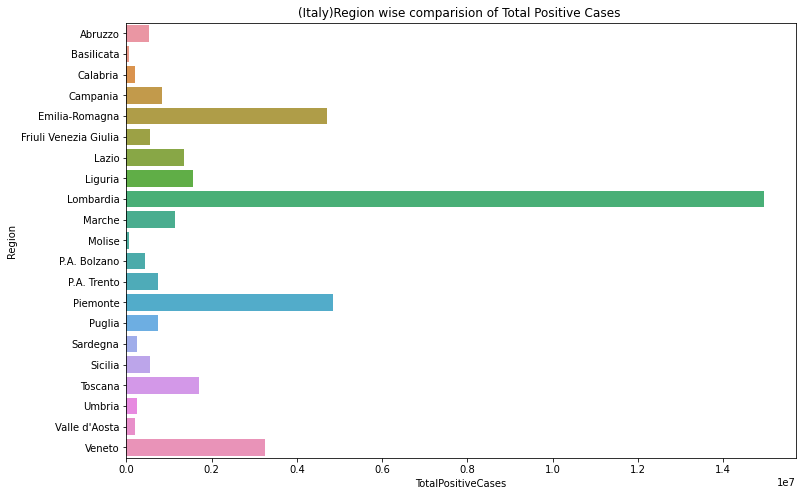

In [130]:
#(Italy)Region wise comparision of Total Positive Cases 
plt.figure(figsize=(12,8))
plot=sns.barplot(italy['TotalPositiveCases'],italy['Region'])
plt.title('(Italy)Region wise comparision of Total Positive Cases ')
plt.show()

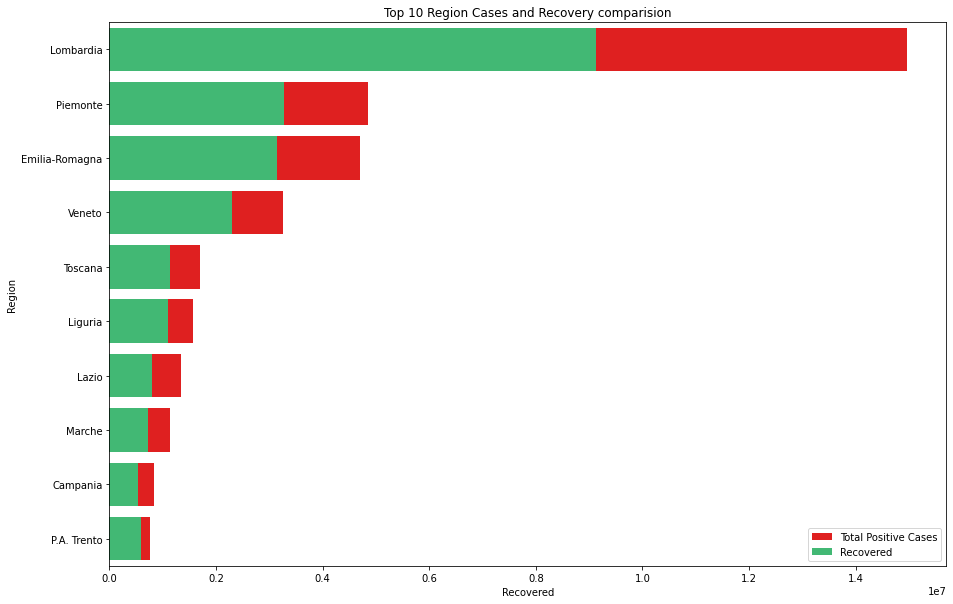

In [131]:
#Sorting the top 10 region and comparing the Total positive case and recoveries. 
major_10 =italy.sort_values(by=['TotalPositiveCases'],ascending=False).head(10)
plt.figure(figsize=(15,10))
TotalPositiveCases =sns.barplot(major_10['TotalPositiveCases'],major_10['Region'],color='red',label='Total Positive Cases')
Recovered =sns.barplot(major_10['Recovered'],major_10['Region'],color='#2ECC71',label='Recovered')
plt.title('Top 10 Region Cases and Recovery comparision')
plt.legend(loc=4)
plt.show()